In [110]:
import torch
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import sin

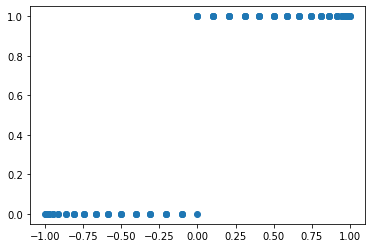

In [126]:
x1_points = []
x2_points = []
y_points = []

for i in range(100):
    
    # We need to normalize X values to ensure that our obj function doesn't blow up in value 
    x1_points.append(float(i)/100)
    x2_points.append(sin((i/30)*torch.pi))

    if x1_points[-1] * x2_points[-1] < 0:
        y_points.append(0)
    else:
        y_points.append(1)


plt.plot(x2_points, y_points, "o")
plt.show()

In [112]:
# Lets create a new joint x_points list

x_points = []

for i in range(len(x1_points)):
    x_points.append([x1_points[i], x2_points[i]])

In [113]:
# Split data into training and validation sets

X_train, X_test, y_train, y_test = train_test_split(x_points, y_points, test_size=0.3, random_state=42)

In [114]:
# Now that we've generated some points at random, its time to use torch 
# to execute linear regression

X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)

X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test)

In [115]:
X_train[:,0]

tensor([0.1100, 0.4700, 0.8500, 0.2800, 0.9300, 0.0500, 0.6600, 0.6500, 0.3500,
        0.1600, 0.4900, 0.3400, 0.0700, 0.9500, 0.2700, 0.1900, 0.8100, 0.2500,
        0.6200, 0.1300, 0.2400, 0.0300, 0.1700, 0.3800, 0.0800, 0.7800, 0.0600,
        0.6400, 0.3600, 0.8900, 0.5600, 0.9900, 0.5400, 0.4300, 0.5000, 0.6700,
        0.4600, 0.6800, 0.6100, 0.9700, 0.7900, 0.4100, 0.5800, 0.4800, 0.9800,
        0.5700, 0.7500, 0.3200, 0.9400, 0.5900, 0.6300, 0.8400, 0.3700, 0.2900,
        0.0100, 0.5200, 0.2100, 0.0200, 0.2300, 0.8700, 0.9100, 0.7400, 0.8600,
        0.8200, 0.2000, 0.6000, 0.7100, 0.1400, 0.9200, 0.5100])

In [116]:
# Helper function for finding the optimal b
def grad_descent(y, b, lr=1):  # Learning rate for Log. Reg. needed to be larger than linear regression
    grad = torch.autograd.grad(y, b)[0]

    return b - lr * grad, grad

# Helper function for representing the objective function
def obj_fun(b):
    
    # h is the probability parameter here
    h = 1/(1 + torch.exp((b[0] + b[1]*X_train[:,0] + b[2]*X_train[:,1])))

    # We want to leverage h in the appropriate loss function for log. reg.
    return -1*torch.sum(y_train*torch.log(h) + (1-y_train)*torch.log(1 - h))/len(X_train)

# Initial guess for b
b = torch.tensor([1.0, 1.0, 1.0], requires_grad=True)

# Optimization loop
for i in range(1200):  # Increased the number of iterations for better convergence
    loss = obj_fun(b)
    print(F"loss = {loss}")
    b, grad = grad_descent(loss, b)
    print(f"Iteration {i+1}: b = {b}, Loss = {loss.item()}")
    print(grad)

# Final result
print("Optimal b:", b)

loss = 1.4072471857070923
Iteration 1: b = tensor([0.5981, 0.8299, 0.6117], grad_fn=<SubBackward0>), Loss = 1.4072471857070923
tensor([0.4019, 0.1701, 0.3883])
loss = 1.0868630409240723
Iteration 2: b = tensor([0.2720, 0.6955, 0.2456], grad_fn=<SubBackward0>), Loss = 1.0868630409240723
tensor([0.3261, 0.1343, 0.3661])
loss = 0.850359320640564
Iteration 3: b = tensor([ 0.0305,  0.6013, -0.0847], grad_fn=<SubBackward0>), Loss = 0.850359320640564
tensor([0.2415, 0.0943, 0.3303])
loss = 0.6912296414375305
Iteration 4: b = tensor([-0.1352,  0.5431, -0.3746], grad_fn=<SubBackward0>), Loss = 0.6912296414375305
tensor([0.1657, 0.0581, 0.2899])
loss = 0.5870205163955688
Iteration 5: b = tensor([-0.2445,  0.5118, -0.6283], grad_fn=<SubBackward0>), Loss = 0.5870205163955688
tensor([0.1094, 0.0314, 0.2537])
loss = 0.5158469080924988
Iteration 6: b = tensor([-0.3164,  0.4979, -0.8524], grad_fn=<SubBackward0>), Loss = 0.5158469080924988
tensor([0.0718, 0.0139, 0.2241])
loss = 0.4639216959476471
Iter

In [117]:
# Define the regression function

def regression_line(b, x_values):

    y_pred = []

    for x in x_values:
        p = 1/(1 + torch.exp(float(b[0]) + float(b[1])*x[0] + float(b[2])*x[1]))
        
        if p < .5:
            y_pred.append(0)
        else:
            y_pred.append(1)

    return y_pred

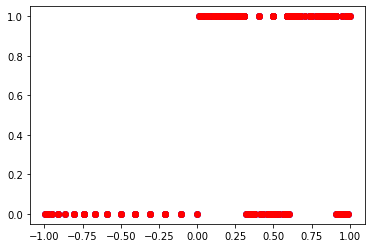

In [118]:
# Call the function and get y_pred

y_pred  = regression_line(b, X_train)

plt.plot(X_train, y_train, "o", color="blue")
plt.plot(X_train, y_pred, "o", color="red")

plt.show()

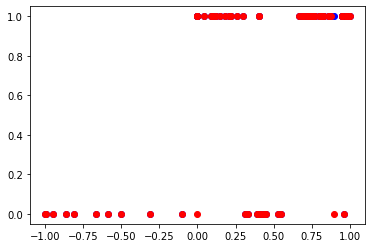

In [119]:
# Call the function and get y_pred

y_pred  = regression_line(b, X_test)

plt.plot(X_test, y_test, "o", color="blue")
plt.plot(X_test, y_pred, "o", color="red")

plt.show()

In [120]:
# Lets calculate the mean squared error

def MSE(y_pred, y_true):

    residuals = 0

    for i in range(len(y_pred)):
        residuals += (y_pred[i] - y_true[i])**2

    return residuals/len(y_pred)

In [121]:
MSE(y_pred, y_test)

tensor(0.0333)

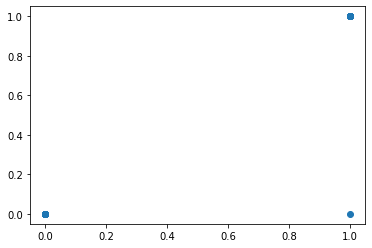

In [122]:
plt.plot(y_test, y_pred, "o")